In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy 

In [2]:
convers =pd.read_csv('conversion.csv', sep = ',')  # товарные позиции, входящие в заказы

### Задание 2
Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

Сколько уникальных рекламных кампаний было проведено? 

Note: использовать идентификатор кампании в базе Х – xyz_campaign_id.

In [3]:
convers.agg({'xyz_campaign_id':'nunique'})

xyz_campaign_id    3
dtype: int64

### Задание 3
Посмотрите на данные и их описание. Соотнесите названия переменных с соответствующим типом данных.

In [4]:
convers_imp=np.log(convers.groupby('fb_campaign_id').Impressions.sum()).reset_index()
convers_imp.head(2)

,fb_campaign_id,Impressions
0,103916,8.902456
1,103917,9.790375


### Задание 4
Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения. Выберите верные утверждения:

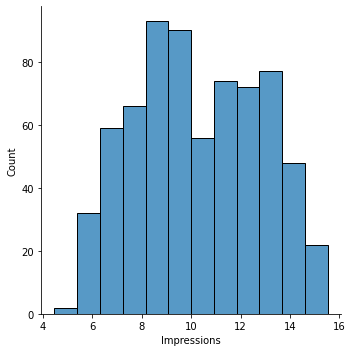

In [5]:
sns.displot(convers_imp.Impressions, kde = False)

### Задание 5
Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.

CTR= clicks / impressions


Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [6]:
convers_5=convers

In [7]:
convers_5['CTR'] = (convers_5.Clicks / convers_5.Impressions)*100
convers_5.sort_values('CTR', ascending = False).head(1)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.105932


### Задание 6
Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). Какому графику соответствует распределение CTR кампании 916?

In [8]:
convers_6=convers_5

In [9]:
convers_6_1=convers_6.query("xyz_campaign_id == 916")[['CTR']]

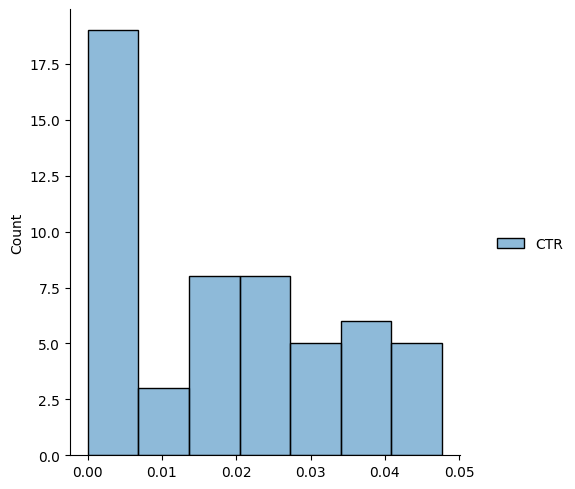

In [10]:
sns.displot(convers_6_1, kde = False)

### Задание 7
CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов:

CPC= spent / clicks

 
Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.

Обратите внимание, что в столбце могут встретиться NaN. Если вы используете функцию iqr из scipy, то следует указать аргумент nan_policy='omit', чтобы их проигнорировать. При построении графика необходимо использовать метод .dropna().

Если нужна помощь, напишите сюда

In [11]:
convers7= convers

In [12]:
convers7['CPC'] = (convers7.Spent / convers7.Clicks)
convers7.head(2)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,0.91


In [13]:
scipy.stats.iqr(convers7.CPC, nan_policy='omit').round(2)

0.25

### Задание 8
Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?

In [14]:
convers8=convers7
convers8=convers8.dropna()
convers8.head(2)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,0.91


In [15]:
convers8_m=convers8.query("gender == 'M'")['CPC']

In [16]:
convers8_f=convers8.query("gender == 'F'")['CPC']

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPC', ylabel='Density'>

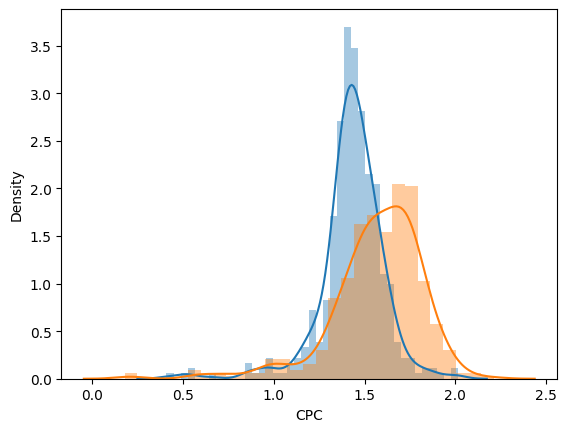

In [17]:
sns.distplot(convers8_f)
sns.distplot(convers8_m)

### Задание 9
Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки. Например, если значение кликов равно 10, а покупок – 2, то CR на данном этапе составляет 2/10=0.2=20.

Note: клики – Clicks, покупки – Approved_Conversion.

In [19]:
convers9=convers

In [24]:
convers9['conversion_rate']=convers9.Approved_Conversion / convers9.Clicks

In [25]:
convers9.query("ad_id == 1121814").conversion_rate.round(2)

860    0.03
Name: conversion_rate, dtype: float64